In [1]:
#basic package
import tqdm
import os
import numpy as np
import pandas as pd
import sys
import time
import glob
import datetime as dt
import itertools
import math
import random
import pickle
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from numpy.linalg import eig #eigenvector decomposition

#plot
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.colors import LinearSegmentedColormap  # to define our own palette for plots

In [2]:
PACKAGE_PARENT = '../'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser('__file__'))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))
import config_origins as config

path_extracted_data = config.path_extracted_data
id_run = config.id_run
print(id_run)

ALLDATA_


# Download mean and CI estimates

In [3]:
df_IC = pd.read_csv(os.path.join(path_extracted_data,'df_CI_BRMS_BS_pred_allvar_moreit.csv'), sep=',')
print(df_IC.shape) 
display(df_IC.head(3))

df_mean = pd.read_csv(os.path.join(path_extracted_data,'df_mean_BRMS_BS_pred_allvar_moreit.csv'), sep=',')
print(df_mean.shape) 
display(df_mean.head(3))

df = pd.merge(df_mean, df_IC, on=['Unnamed: 0'], how='outer')
df.rename(columns={'Unnamed: 0':'parameter','x':'value_mean'}, inplace=True)
df['text'] = df.apply(lambda x: "%.2f" % round(x['value_mean'],2)+' ['+"%.2f" % round(x['lower'],2)+', '+"%.2f" % round(x['upper'],2)+']', 
                          axis=1)
print(df.shape) 
display(df.head(3))

(1011, 3)


,Unnamed: 0,lower,upper
0,b_foodsameDurTimingr50final_Intercept,0.171812,0.262792
1,b_verticaltraveldistancefulllightperinsideh_In...,3.940338,4.532319
2,b_midcumZ4hMorning_Intercept,1.473229,1.530629


(1011, 2)


,Unnamed: 0,x
0,b_foodsameDurTimingr50final_Intercept,0.218088
1,b_verticaltraveldistancefulllightperinsideh_In...,4.243906
2,b_midcumZ4hMorning_Intercept,1.502226


(1011, 5)


,parameter,value_mean,lower,upper,text
0,b_foodsameDurTimingr50final_Intercept,0.218088,0.171812,0.262792,"0.22 [0.17, 0.26]"
1,b_verticaltraveldistancefulllightperinsideh_In...,4.243906,3.940338,4.532319,"4.24 [3.94, 4.53]"
2,b_midcumZ4hMorning_Intercept,1.502226,1.473229,1.530629,"1.50 [1.47, 1.53]"


In [4]:
display(list(df['parameter'].unique()))

['b_foodsameDurTimingr50final_Intercept',
 'b_verticaltraveldistancefulllightperinsideh_Intercept',
 'b_midcumZ4hMorning_Intercept',
 'b_SleepingUppest_Intercept',
 'b_WentinWG_Intercept',
 'b_foodsameDurTimingr50final_TreatmentOFH',
 'b_foodsameDurTimingr50final_FoodPenIDFoodPenID5M8',
 'b_foodsameDurTimingr50final_FoodPenIDFoodPenID9M12',
 'b_foodsameDurTimingr50final_scaleweightInterp',
 'b_foodsameDurTimingr50final_scaleKBFInterp',
 'b_foodsameDurTimingr50final_scaleDIB',
 'b_verticaltraveldistancefulllightperinsideh_TreatmentOFH',
 'b_verticaltraveldistancefulllightperinsideh_scaleweightInterp',
 'b_verticaltraveldistancefulllightperinsideh_scaleKBFInterp',
 'b_verticaltraveldistancefulllightperinsideh_scaleDIB',
 'b_midcumZ4hMorning_TreatmentOFH',
 'b_midcumZ4hMorning_scaleweightInterp',
 'b_midcumZ4hMorning_scaleKBFInterp',
 'b_midcumZ4hMorning_scaleDIB',
 'b_SleepingUppest_TreatmentOFH',
 'b_SleepingUppest_scaleweightInterp',
 'b_SleepingUppest_scaleKBFInterp',
 'b_SleepingUppe

In [5]:
df['type'] = df['parameter'].map(lambda x: x.split('_')[0])
df['type'].value_counts()

r        965
b         27
cor       10
sd         5
sigma      2
shape      1
lp         1
Name: type, dtype: int64

In [6]:
#henID intercept random intercept
df['HenID'] = df['parameter'].map(lambda x: x.split(',')[0].split('[')[-1] if 'hen_' in x else None)
#else None, otherwise will utput the entire name (i.e. x)
df['HenID'].unique()

array([None, 'hen_1', 'hen_10', 'hen_101', 'hen_102', 'hen_105',
       'hen_106', 'hen_107', 'hen_108', 'hen_109', 'hen_111', 'hen_112',
       'hen_113', 'hen_115', 'hen_116', 'hen_118', 'hen_119', 'hen_12',
       'hen_120', 'hen_122', 'hen_123', 'hen_124', 'hen_126', 'hen_127',
       'hen_128', 'hen_13', 'hen_131', 'hen_133', 'hen_134', 'hen_135',
       'hen_136', 'hen_137', 'hen_138', 'hen_139', 'hen_14', 'hen_140',
       'hen_141', 'hen_142', 'hen_143', 'hen_144', 'hen_145', 'hen_146',
       'hen_147', 'hen_149', 'hen_15', 'hen_150', 'hen_151', 'hen_152',
       'hen_153', 'hen_154', 'hen_155', 'hen_156', 'hen_158', 'hen_159',
       'hen_163', 'hen_164', 'hen_165', 'hen_166', 'hen_167', 'hen_168',
       'hen_169', 'hen_17', 'hen_170', 'hen_171', 'hen_172', 'hen_173',
       'hen_174', 'hen_175', 'hen_177', 'hen_18', 'hen_180', 'hen_181',
       'hen_182', 'hen_183', 'hen_184', 'hen_185', 'hen_186', 'hen_187',
       'hen_188', 'hen_189', 'hen_19', 'hen_190', 'hen_191', 'hen

In [7]:
#mvt variable for the hen intercepts to be visualised
df['mvtvariable'] = df['parameter'].map(lambda x: x.split('r_HenID__')[-1].split('[')[0] if ('r_HenID__' in x) \
                                        & ('cor_HenID' not in x) else None)
li_mvt = [i for i in df['mvtvariable'].unique() if i!=None]
li_mvt

['foodsameDurTimingr50final',
 'verticaltraveldistancefulllightperinsideh',
 'midcumZ4hMorning',
 'SleepingUppest',
 'WentinWG']

In [8]:
#correlations
df_cor_summarized = df[df['type']=='cor'].copy()
for mvt in li_mvt:
    df_cor_summarized[mvt] = df_cor_summarized['parameter'].map(lambda x: mvt in x)
df_cor_summarized

,parameter,value_mean,lower,upper,text,type,HenID,mvtvariable,foodsameDurTimingr50final,verticaltraveldistancefulllightperinsideh,midcumZ4hMorning,SleepingUppest,WentinWG
32,cor_HenID__foodsameDurTimingr50final_Intercept...,0.433805,0.301858,0.561789,"0.43 [0.30, 0.56]",cor,None,None,True,True,False,False,False
33,cor_HenID__foodsameDurTimingr50final_Intercept...,-0.066536,-0.208622,0.099829,"-0.07 [-0.21, 0.10]",cor,None,None,True,False,True,False,False
34,cor_HenID__verticaltraveldistancefulllightperi...,-0.019592,-0.165649,0.127437,"-0.02 [-0.17, 0.13]",cor,None,None,False,True,True,False,False
35,cor_HenID__foodsameDurTimingr50final_Intercept...,-0.147205,-0.295403,0.013829,"-0.15 [-0.30, 0.01]",cor,None,None,True,False,False,True,False
36,cor_HenID__verticaltraveldistancefulllightperi...,-0.243164,-0.392040,-0.099970,"-0.24 [-0.39, -0.10]",cor,None,None,False,True,False,True,False
37,cor_HenID__midcumZ4hMorning_Intercept__Sleepin...,-0.043764,-0.199771,0.111166,"-0.04 [-0.20, 0.11]",cor,None,None,False,False,True,True,False
38,cor_HenID__foodsameDurTimingr50final_Intercept...,0.276202,0.132645,0.429207,"0.28 [0.13, 0.43]",cor,None,None,True,False,False,False,True
39,cor_HenID__verticaltraveldistancefulllightperi...,0.518324,0.400697,0.628691,"0.52 [0.40, 0.63]",cor,None,None,False,True,False,False,True
40,cor_HenID__midcumZ4hMorning_Intercept__WentinW...,-0.035209,-0.189819,0.113176,"-0.04 [-0.19, 0.11]",cor,None,None,False,False,True,False,True
41,cor_HenID__SleepingUppest_Intercept__WentinWG_...,0.049731,-0.101165,0.209770,"0.05 [-0.10, 0.21]",cor,None,None,False,False,False,True,True


In [9]:
#sd
df_sd_summarized = df[df['type']=='sd'].copy()
df_sd_summarized['parameter'] = df_sd_summarized['parameter'].map(lambda x: x.split('sd_HenID__')[-1])
df_sd_summarized

,parameter,value_mean,lower,upper,text,type,HenID,mvtvariable
27,foodsameDurTimingr50final_Intercept,0.139556,0.124578,0.155893,"0.14 [0.12, 0.16]",sd,None,None
28,verticaltraveldistancefulllightperinsideh_Inte...,1.471649,1.326614,1.629046,"1.47 [1.33, 1.63]",sd,None,None
29,midcumZ4hMorning_Intercept,0.140106,0.124413,0.155132,"0.14 [0.12, 0.16]",sd,None,None
30,SleepingUppest_Intercept,2.277496,1.972234,2.579345,"2.28 [1.97, 2.58]",sd,None,None
31,WentinWG_Intercept,2.198711,1.924335,2.520082,"2.20 [1.92, 2.52]",sd,None,None


# Behavioural syndrome

### correlation matrix

In [10]:
dico_mvt_name = {'foodsameDurTimingr50final':'food reactivity index',
                 'verticaltraveldistancefulllightperinsideh':'vertical travelled distance',
                 'midcumZ4hMorning':'mid-nestbox zone usage',
                 'SleepingUppest':'has slept on top tier',
                 'WentinWG':'has been outside'}

['foodsameDurTimingr50final', 'verticaltraveldistancefulllightperinsideh', 'midcumZ4hMorning', 'SleepingUppest', 'WentinWG']
[[        nan  0.43380523 -0.0665356  -0.14720472  0.27620227]
 [        nan         nan -0.01959181 -0.24316414  0.51832404]
 [        nan         nan         nan -0.04376439 -0.03520917]
 [        nan         nan         nan         nan  0.0497314 ]
 [        nan         nan         nan         nan         nan]]


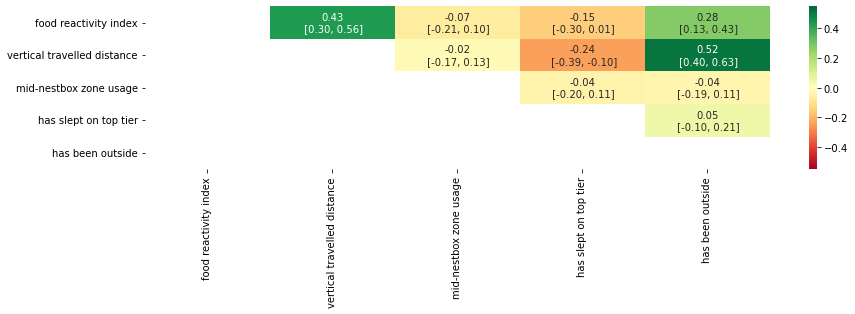

In [11]:
print(li_mvt)
CorrM = np.zeros(shape=(len(li_mvt), len(li_mvt)))
labels_ = np.array([['                                '] * len(li_mvt)] * len(li_mvt))
for i in range(0,len(li_mvt)):
    CorrM[i][i] = np.nan
    for j in range(i+1,len(li_mvt)):
        mvt1 = li_mvt[i]
        mvt2 = li_mvt[j]
        v = df_cor_summarized[(df_cor_summarized[mvt1])&(df_cor_summarized[mvt2])]['value_mean'].values[0]     
        CorrM[i][j] = v
        CorrM[j][i] = np.nan
        t = df_cor_summarized[(df_cor_summarized[mvt1])&(df_cor_summarized[mvt2])]['text'].values[0] 
        t = t.replace(' [','\n [')
        labels_[i][j] = t
        labels_[j][i] = ''
print(CorrM)
#print(labels_)
plt.figure(figsize=(14,3)) #9, 6.5
sns.heatmap(CorrM, cmap='RdYlGn', annot=labels_, fmt = '', 
            xticklabels=[dico_mvt_name[i] for i in li_mvt], yticklabels=[dico_mvt_name[i] for i in li_mvt],
           vmin=-0.55, vmax=0.55)
#fmt = ''is required for string labels
plt.xlabel('');
plt.ylabel('');
plt.savefig(os.path.join(path_extracted_data,'BS_corr.png'),dpi=300,format='png',bbox_inches='tight')
plt.show();

### eigenvector decomposition

In [61]:
#covariance matrix
#Cov(X,Y) = corr(X,Y) * SD(X) * SD(Y) 
print(li_mvt)
CovM = np.zeros(shape=(len(li_mvt), len(li_mvt)))
for i in range(0,len(li_mvt)):
    mvt1 = li_mvt[i]
    CovM[i][i] = round(df_sd_summarized[df_sd_summarized['parameter']==mvt1+'_Intercept']['value_mean'].values[0]**2,2)
    for j in range(i+1,len(li_mvt)):
        mvt2 = li_mvt[j]
        cor12 = df_cor_summarized[(df_cor_summarized[mvt1])&(df_cor_summarized[mvt2])]['value_mean'].values[0]  
        sd1 = df_sd_summarized[df_sd_summarized['parameter']==mvt1+'_Intercept']['value_mean'].values[0]
        sd2 = df_sd_summarized[df_sd_summarized['parameter']==mvt2+'_Intercept']['value_mean'].values[0]
        CovM[i][j] = round(cor12 * sd1 * sd2,2)
        CovM[j][i] = round(cor12 * sd1 * sd2,2)
print(CovM)
#eigen decomposition sorted by biggest eingenvalues
eigenValues, eigenVectors = eig(CovM)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
print(li_mvt)
print(eigenValues)
comp1 = list(eigenVectors[:,0])
comp2 = list(eigenVectors[:,1])
display(eigenVectors)#first columns: pc1 (multiple 0,0 by limvt0, 1,0 by VTD,... ;  second: pc2
print(comp1)
print(comp2)
print(sum(eigenValues))
#unit length vector
print(np.sqrt(sum([i*i for i in comp1])))
print(np.sqrt(sum([i*i for i in comp2])))
#--> the cov matrix shows really different variances, which will be unfarie to some var

['foodsameDurTimingr50final', 'verticaltraveldistancefulllightperinsideh', 'midcumZ4hMorning', 'SleepingUppest', 'WentinWG']
[[ 0.02  0.09 -0.   -0.05  0.08]
 [ 0.09  2.17 -0.   -0.82  1.68]
 [-0.   -0.    0.02 -0.01 -0.01]
 [-0.05 -0.82 -0.01  5.19  0.25]
 [ 0.08  1.68 -0.01  0.25  4.83]]
['foodsameDurTimingr50final', 'verticaltraveldistancefulllightperinsideh', 'midcumZ4hMorning', 'SleepingUppest', 'WentinWG']
[5.69694828 5.31760971 1.17934235 0.01995941 0.01614025]


array([[ 2.19700617e-02, -2.50623961e-03,  3.05330884e-02,
        -4.00236796e-04,  9.99289050e-01],
       [ 4.68475856e-01, -1.39109180e-02,  8.82577903e-01,
        -1.28503955e-03, -3.73021710e-02],
       [-7.79321844e-04, -2.50316608e-03,  1.84521625e-03,
         9.99994798e-01,  3.54995162e-04],
       [-3.62820913e-01,  9.08549787e-01,  2.07075462e-01,
         1.60801132e-03,  3.92902487e-03],
       [ 8.05237894e-01,  4.17529908e-01, -4.20999197e-01,
         2.45087964e-03, -3.79200557e-03]])

[0.021970061742788406, 0.4684758563233365, -0.0007793218444833473, -0.3628209133916855, 0.8052378939743337]
[-0.0025062396074399707, -0.01391091797284417, -0.002503166084421047, 0.9085497866652305, 0.41752990843088217]
12.23000000000001
0.9999999999999999
0.9999999999999999


In [71]:
#https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
print(li_mvt)
Corr = np.zeros(shape=(len(li_mvt), len(li_mvt)))
for i in range(0,len(li_mvt)):
    Corr[i][i] = 1
    for j in range(i+1,len(li_mvt)):
        mvt1 = li_mvt[i]
        mvt2 = li_mvt[j]
        v = df_cor_summarized[(df_cor_summarized[mvt1])&(df_cor_summarized[mvt2])]['value_mean'].values[0]     
        Corr[i][j] = v
        Corr[j][i] = v
print(Corr)
#eigen decomposition sorted by biggest eingenvalues
eigenValues, eigenVectors = eig(Corr)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
#in R would simply be: eigen(Corr). same result
print(li_mvt)
print(eigenValues)
comp1 = list(eigenVectors[:,0])
comp2 = list(eigenVectors[:,1])
#unit length vector
print(np.sqrt(sum([i*i for i in comp1])))
print(eigenVectors)#first columns: pc1 (multiple 0,0 by limvt0, 1,0 by VTD,... ;  second: pc2
print('Explained var:')
li_exvar = [i/sum(eigenValues) for i in eigenValues]
print(sum(li_exvar))
li_exvar

['foodsameDurTimingr50final', 'verticaltraveldistancefulllightperinsideh', 'midcumZ4hMorning', 'SleepingUppest', 'WentinWG']
[[ 1.          0.43380523 -0.0665356  -0.14720472  0.27620227]
 [ 0.43380523  1.         -0.01959181 -0.24316414  0.51832404]
 [-0.0665356  -0.01959181  1.         -0.04376439 -0.03520917]
 [-0.14720472 -0.24316414 -0.04376439  1.          0.0497314 ]
 [ 0.27620227  0.51832404 -0.03520917  0.0497314   1.        ]]
['foodsameDurTimingr50final', 'verticaltraveldistancefulllightperinsideh', 'midcumZ4hMorning', 'SleepingUppest', 'WentinWG']
[1.8787365  1.07549613 0.969924   0.68442818 0.39141518]
1.0
[[-0.51958843 -0.01876867  0.13414121 -0.81870246 -0.2034896 ]
 [-0.63091164 -0.05093528 -0.06293641  0.2064696   0.74348195]
 [ 0.06305182 -0.56383531 -0.80829958 -0.15705856 -0.00992981]
 [ 0.22877234  0.75101045 -0.44959396 -0.30897918  0.293332  ]
 [-0.52503908  0.33930278 -0.35008885  0.40860869 -0.56540633]]
Explained var:
1.0


[0.37574729972566273,
 0.21509922639758092,
 0.19398480030810086,
 0.1368856368269007,
 0.07828303674175484]

In [72]:
df_allit = pd.read_csv(os.path.join(path_extracted_data,'BRMS_BS_pred_allvar_moreit.csv'), sep=',')
print(df_allit.shape)  #(1250, 4044) ou (5000, 1011)
li_col = set([x for x in list(df_allit.columns) if 'cor_HenID__' in x]) #X*, where * is the number of chain
print(len(li_col))
display(li_col)
df_allit = df_allit[li_col].copy()
df_allit['run'] = df_allit.index
print(df_allit.shape)
display(df_allit.head(3))

(1250, 4045)
40


{'X1.cor_HenID__SleepingUppest_Intercept__WentinWG_Intercept',
 'X1.cor_HenID__foodsameDurTimingr50final_Intercept__SleepingUppest_Intercept',
 'X1.cor_HenID__foodsameDurTimingr50final_Intercept__WentinWG_Intercept',
 'X1.cor_HenID__foodsameDurTimingr50final_Intercept__midcumZ4hMorning_Intercept',
 'X1.cor_HenID__foodsameDurTimingr50final_Intercept__verticaltraveldistancefulllightperinsideh_Intercept',
 'X1.cor_HenID__midcumZ4hMorning_Intercept__SleepingUppest_Intercept',
 'X1.cor_HenID__midcumZ4hMorning_Intercept__WentinWG_Intercept',
 'X1.cor_HenID__verticaltraveldistancefulllightperinsideh_Intercept__SleepingUppest_Intercept',
 'X1.cor_HenID__verticaltraveldistancefulllightperinsideh_Intercept__WentinWG_Intercept',
 'X1.cor_HenID__verticaltraveldistancefulllightperinsideh_Intercept__midcumZ4hMorning_Intercept',
 'X2.cor_HenID__SleepingUppest_Intercept__WentinWG_Intercept',
 'X2.cor_HenID__foodsameDurTimingr50final_Intercept__SleepingUppest_Intercept',
 'X2.cor_HenID__foodsameDurTimi

(1250, 41)


,X3.cor_HenID__midcumZ4hMorning_Intercept__WentinWG_Intercept,X3.cor_HenID__verticaltraveldistancefulllightperinsideh_Intercept__WentinWG_Intercept,X3.cor_HenID__SleepingUppest_Intercept__WentinWG_Intercept,X2.cor_HenID__foodsameDurTimingr50final_Intercept__verticaltraveldistancefulllightperinsideh_Intercept,X4.cor_HenID__verticaltraveldistancefulllightperinsideh_Intercept__SleepingUppest_Intercept,X2.cor_HenID__foodsameDurTimingr50final_Intercept__SleepingUppest_Intercept,X1.cor_HenID__foodsameDurTimingr50final_Intercept__verticaltraveldistancefulllightperinsideh_Intercept,X2.cor_HenID__verticaltraveldistancefulllightperinsideh_Intercept__midcumZ4hMorning_Intercept,X1.cor_HenID__midcumZ4hMorning_Intercept__WentinWG_Intercept,X2.cor_HenID__midcumZ4hMorning_Intercept__SleepingUppest_Intercept,...,X1.cor_HenID__midcumZ4hMorning_Intercept__SleepingUppest_Intercept,X4.cor_HenID__foodsameDurTimingr50final_Intercept__verticaltraveldistancefulllightperinsideh_Intercept,X4.cor_HenID__foodsameDurTimingr50final_Intercept__WentinWG_Intercept,X4.cor_HenID__foodsameDurTimingr50final_Intercept__SleepingUppest_Intercept,X3.cor_HenID__foodsameDurTimingr50final_Intercept__verticaltraveldistancefulllightperinsideh_Intercept,X2.cor_HenID__foodsameDurTimingr50final_Intercept__midcumZ4hMorning_Intercept,X1.cor_HenID__verticaltraveldistancefulllightperinsideh_Intercept__SleepingUppest_Intercept,X1.cor_HenID__SleepingUppest_Intercept__WentinWG_Intercept,X2.cor_HenID__midcumZ4hMorning_Intercept__WentinWG_Intercept,run
0,0.000093,0.482211,-0.038478,0.413240,-0.201855,-0.153954,0.489115,-0.152764,-0.045907,-0.099392,...,0.226354,0.569574,0.387038,-0.099138,0.558406,-0.087786,-0.280775,-0.012977,-0.106211,0
1,0.008231,0.517899,-0.070531,0.434888,-0.234636,-0.135147,0.445514,-0.153585,0.005128,-0.130676,...,0.116802,0.568837,0.347376,-0.151088,0.538419,-0.108645,-0.355827,0.004355,-0.081188,1
2,-0.157218,0.465406,-0.100918,0.488948,-0.309972,-0.244939,0.457103,-0.139814,-0.029364,-0.087198,...,0.072365,0.557234,0.251144,-0.270779,0.436077,-0.296980,-0.227921,0.052535,-0.083335,2


In [73]:
print(len([x for x in list(df_allit.columns) if 'X1' in x]))
len(set([x for x in list(df_allit.columns) if 'X1' in x]))

10


10

In [77]:
#initialise output
li_comp1 = []
li_comp2 = []
print(li_mvt)
li_chain = list(set([x.split('.')[0] for x in list(df_allit.columns) if 'X' in x]))
print(li_chain)
for run in tqdm.tqdm(df_allit['run'].unique()):
    for chain in li_chain:
        df_ = df_allit[df_allit['run']==run][[x for x in list(df_allit.columns) if 'X1' in x]].copy()
        M = np.zeros(shape=(len(li_mvt), len(li_mvt)))
        for i in range(0,len(li_mvt)):
            M[i][i] = 1
            for j in range(i+1,len(li_mvt)):
                mvt1 = li_mvt[i]
                mvt2 = li_mvt[j]
                vc = [x for x in list(df_.columns) if (mvt1 in x)&(mvt2 in x)]
                if len(vc)!=1:
                    print('ERROR')
                    print(vc)
                    sys.exit()
                v = df_[vc[0]].values[0]
                M[i][j] = v
                M[j][i] = v
        #print(M)
        #eigen decomposition sorted by biggest eingenvalues
        eigenValues, eigenVectors = eig(M)
        idx = eigenValues.argsort()[::-1]   
        eigenValues = eigenValues[idx]
        eigenVectors = eigenVectors[:,idx]
        #extract first and second column
        li_comp1.append(eigenVectors[:,0])
        li_comp2.append(eigenVectors[:,1])
df_pc1loading = pd.DataFrame(li_comp1, columns=li_mvt)
df_pc2loading = pd.DataFrame(li_comp2, columns=li_mvt)
print(df_pc1loading.shape)
display(df_pc1loading.head(5))

#because Eigenvectors are not unique & multiplying by any constant, including -1 (which simply changes the sign), gives 
#another valid eigenvecto, we have to account for this
df_pc1loading['verticaltraveldistancefulllightperinsideh'] = np.where(df_pc1loading['foodsameDurTimingr50final']>0, 
                                 df_pc1loading['verticaltraveldistancefulllightperinsideh'], #where condition is True (>0:keep)
                                 df_pc1loading['verticaltraveldistancefulllightperinsideh']*-1)
df_pc1loading['midcumZ4hMorning'] = np.where(df_pc1loading['foodsameDurTimingr50final']>0, 
                                 df_pc1loading['midcumZ4hMorning'], #where condition is True
                                 df_pc1loading['midcumZ4hMorning']*-1)
df_pc1loading['SleepingUppest'] = np.where(df_pc1loading['foodsameDurTimingr50final']>0, 
                                 df_pc1loading['SleepingUppest'], #where condition is True
                                 df_pc1loading['SleepingUppest']*-1)
df_pc1loading['WentinWG'] = np.where(df_pc1loading['foodsameDurTimingr50final']>0, 
                                 df_pc1loading['WentinWG'], #where condition is True
                                 df_pc1loading['WentinWG']*-1)
#have to be done at the end!!!
df_pc1loading['foodsameDurTimingr50final'] = np.where(df_pc1loading['foodsameDurTimingr50final']>0, 
                                 df_pc1loading['foodsameDurTimingr50final'], #where condition is True
                                 df_pc1loading['foodsameDurTimingr50final']*-1)
df_pc1loading.head(5)

['foodsameDurTimingr50final', 'verticaltraveldistancefulllightperinsideh', 'midcumZ4hMorning', 'SleepingUppest', 'WentinWG']
['X2', 'X3', 'X4', 'X1']


100%|█████████████████████████████████████████████████████████████████████████████| 1250/1250 [00:07<00:00, 160.15it/s]

(5000, 5)


,foodsameDurTimingr50final,verticaltraveldistancefulllightperinsideh,midcumZ4hMorning,SleepingUppest,WentinWG
0,0.534989,0.597435,-0.123802,-0.311284,0.494605
1,0.534989,0.597435,-0.123802,-0.311284,0.494605
2,0.534989,0.597435,-0.123802,-0.311284,0.494605
3,0.534989,0.597435,-0.123802,-0.311284,0.494605
4,-0.516074,-0.611819,0.097299,0.378563,-0.454498


,foodsameDurTimingr50final,verticaltraveldistancefulllightperinsideh,midcumZ4hMorning,SleepingUppest,WentinWG
0,0.534989,0.597435,-0.123802,-0.311284,0.494605
1,0.534989,0.597435,-0.123802,-0.311284,0.494605
2,0.534989,0.597435,-0.123802,-0.311284,0.494605
3,0.534989,0.597435,-0.123802,-0.311284,0.494605
4,0.516074,0.611819,-0.097299,-0.378563,0.454498


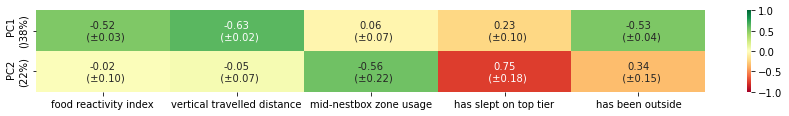

In [79]:
plt.figure(figsize=(15,1.5))
cmap_ = LinearSegmentedColormap.from_list('rg',["lightgrey", "black"], N=256) 
labels_ = np.array([['                   '] * len(li_mvt)] * 2)
for i in range(0,len(li_mvt)):
    labels_[0][i] = '%.2f' %round(comp1[i],2)+'\n  (±'+'%.2f' %round(np.std(abs(df_pc1loading[li_mvt[i]])),2) +')'
    labels_[1][i] = '%.2f' %round(comp2[i],2)+'\n  (±'+'%.2f' %round(np.std(abs(df_pc2loading[li_mvt[i]])),2) +')'
sns.heatmap(np.array([[i*-1 for i in comp1], [i*-1 for i in comp2]]), annot=labels_, fmt = '', cmap='RdYlGn',vmin=-1, vmax=1,
            yticklabels=['PC1 \n()'+str(round(li_exvar[0]*100))+'%)', 'PC2 \n('+str(round(li_exvar[1]*100))+'%)'], 
            xticklabels=[dico_mvt_name[i] for i in li_mvt]);
plt.yticks(rotation=90) 
plt.savefig(os.path.join(path_extracted_data,'BS_PrincComp_loadings.png'),dpi=300,format='png',bbox_inches='tight')
plt.show();

#TODO IF WE WANT a kind of general behavioural index
df_boi = df[~df['HenID'].isnull()].pivot(index='HenID', columns='mvtvariable', values='value_mean').reset_index()
print(df_boi.shape)
df_boi.head(3)
#compute pc1 and pc2
df_boi = df[~df['HenID'].isnull()].pivot(index='HenID', columns='mvtvariable', values='value_mean').reset_index()
print(df_boi.shape)
df_boi.head(3)
df_boi['pc1'] = df_boi.apply(lambda x: sum([x[k]*v for k,v in dico_mvt_pc1.items()]), axis=1)
df_boi['pc2'] = df_boi.apply(lambda x: sum([x[k]*v for k,v in dico_mvt_pc2.items()]), axis=1)
df_boi['pc1_only3var'] = df_boi.apply(lambda x: sum([x[k]*v for k,v in dico_mvt_pc1_3var.items()]), axis=1)
sns.scatterplot(x='pc1', y='pc2', data=df_boi);

In [222]:
750*4

3000

### HenID Intercept

,HenID_,value_mean_SleepingUppest,value_mean_WentinWG,value_mean_foodsameDurTimingr50final,value_mean_midcumZ4hMorning,value_mean_verticaltraveldistancefulllightperinsideh,lower_SleepingUppest,lower_WentinWG,lower_foodsameDurTimingr50final,lower_midcumZ4hMorning,lower_verticaltraveldistancefulllightperinsideh,upper_SleepingUppest,upper_WentinWG,upper_foodsameDurTimingr50final,upper_midcumZ4hMorning,upper_verticaltraveldistancefulllightperinsideh
0,hen_1,2.232589,2.353121,0.074245,-0.158541,-0.536628,-0.719874,0.094681,-0.045285,-0.256834,-1.227882,5.388668,4.642469,0.198749,-0.063311,0.132035
1,hen_10,-5.317669,-1.997466,-0.170681,-0.146956,-0.888038,-7.392600,-2.959847,-0.247531,-0.210890,-1.360511,-3.560715,-1.082975,-0.085026,-0.085629,-0.407685
2,hen_101,-1.637261,1.999725,0.061764,0.020791,0.598246,-2.525921,0.505441,-0.022414,-0.036824,0.131368,-0.811505,3.747972,0.147982,0.082028,1.077551


foodsameDurTimingr50final
verticaltraveldistancefulllightperinsideh
0.433805234499379
0.139556046167948
1.47164949851292
4.574572534356559


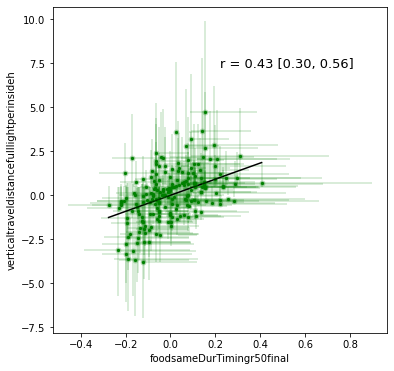

foodsameDurTimingr50final
midcumZ4hMorning
-0.0665355952814259
0.139556046167948
0.140105805830039
-0.06679770206492505


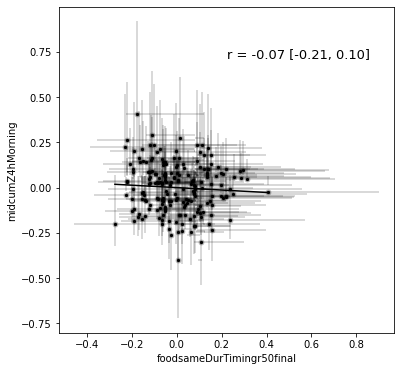

foodsameDurTimingr50final
SleepingUppest
-0.147204723788584
0.139556046167948
2.27749598425592
-2.402319186433078


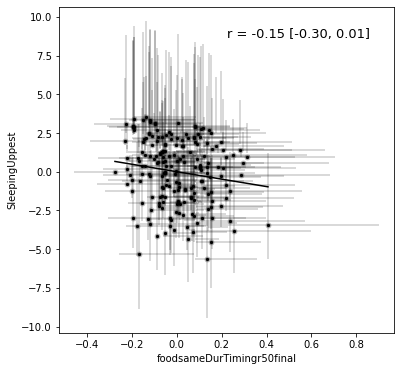

foodsameDurTimingr50final
WentinWG
0.276202269551996
0.139556046167948
2.19871062914915
4.351576893546078


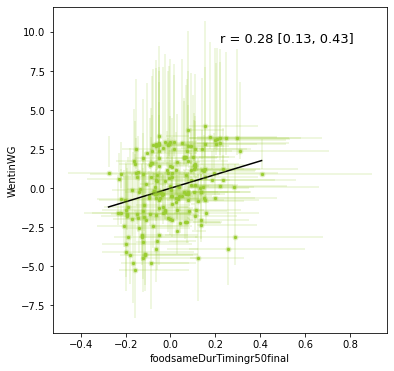

verticaltraveldistancefulllightperinsideh
midcumZ4hMorning
-0.0195918147852203
1.47164949851292
0.140105805830039
-0.0018652043172847003


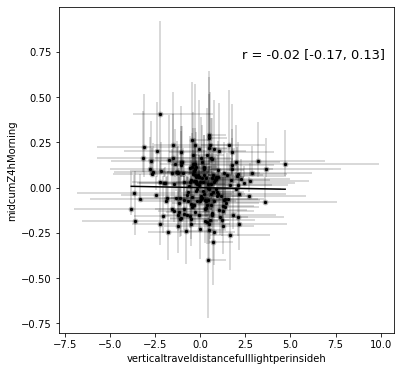

verticaltraveldistancefulllightperinsideh
SleepingUppest
-0.243164144191244
1.47164949851292
2.27749598425592
-0.3763160742216117


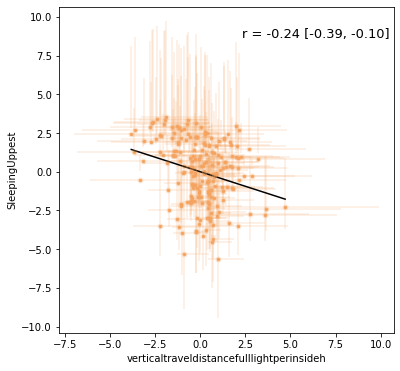

verticaltraveldistancefulllightperinsideh
WentinWG
0.518324035630782
1.47164949851292
2.19871062914915
0.7743994528836362


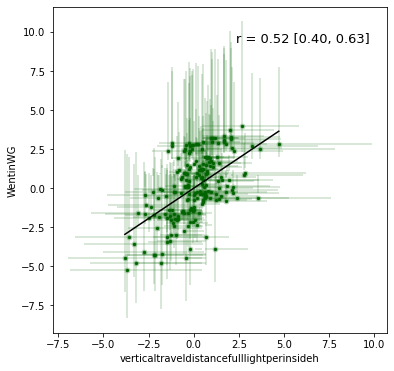

midcumZ4hMorning
SleepingUppest
-0.0437643912875824
0.140105805830039
2.27749598425592
-0.71141395476349


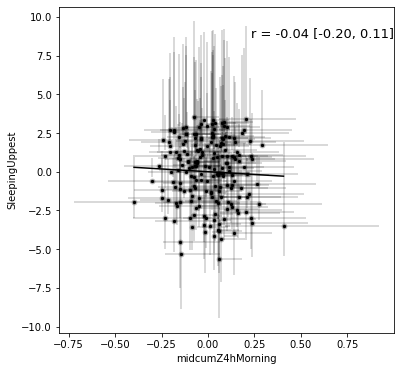

midcumZ4hMorning
WentinWG
-0.0352091696987509
0.140105805830039
2.19871062914915
-0.5525450940560657


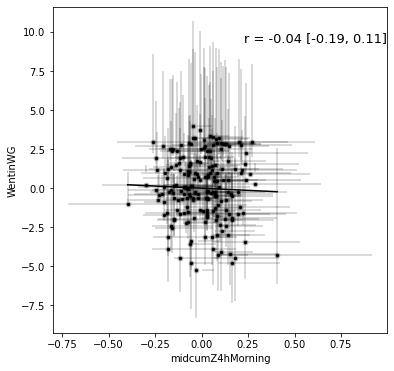

SleepingUppest
WentinWG
0.049731404308711
2.27749598425592
2.19871062914915
0.048011047225534745


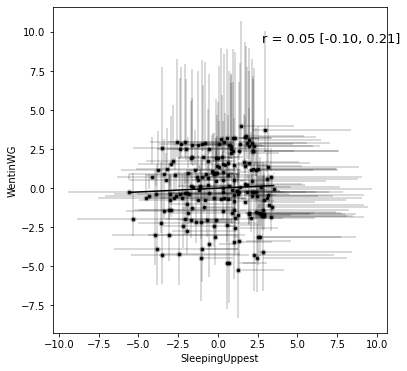

In [14]:
#choose color: https://matplotlib.org/stable/gallery/color/named_colors.html
#df[df['HenID'].isnull()].shape
df_plt = df[~df['HenID'].isnull()].pivot(index='HenID', columns='mvtvariable', values=['value_mean',
                                                                                       'lower','upper']).reset_index()
df_plt.columns = ['_'.join(col) for col in df_plt.columns.values] #joining name from different index
display(df_plt.head(3))
for i in range(0,len(li_mvt)-1):
    for j in range(i+1,len(li_mvt)):
        mvtx = li_mvt[i]
        mvty = li_mvt[j]
        print(mvtx)
        print(mvty)
        cor_mvtx_mvty = df_cor_summarized[(df_cor_summarized[mvtx])&(df_cor_summarized[mvty])]['value_mean'].iloc[0]
        cor_mvtx_mvty_upper = df_cor_summarized[(df_cor_summarized[mvtx])&(df_cor_summarized[mvty])]['upper'].iloc[0]
        cor_mvtx_mvty_lower = df_cor_summarized[(df_cor_summarized[mvtx])&(df_cor_summarized[mvty])]['lower'].iloc[0]
        print(cor_mvtx_mvty)
        sd_mvtx = df_sd_summarized[df_sd_summarized['parameter']==mvtx+'_Intercept']['value_mean'].iloc[0]
        print(sd_mvtx)
        sd_mvty = df_sd_summarized[df_sd_summarized['parameter']==mvty+'_Intercept']['value_mean'].iloc[0]
        print(sd_mvty)        
        slope = cor_mvtx_mvty*sd_mvtx*sd_mvty/(sd_mvtx*sd_mvtx)
        print(slope)
        #choose color:
        li_ = [mvtx, mvty]
        if ('foodsameDurTimingr50final' in li_) & ('verticaltraveldistancefulllightperinsideh' in li_):
            color_ = 'green'
        elif ('foodsameDurTimingr50final' in li_) & ('WentinWG' in li_):
            color_ = 'yellowgreen' #lightsalmon
        elif ('verticaltraveldistancefulllightperinsideh' in li_) & ('SleepingUppest' in li_):
            color_ = 'sandybrown'
        elif ('verticaltraveldistancefulllightperinsideh' in li_) & ('WentinWG' in li_):
            color_ = 'darkgreen'
        else:
            color_ = 'black'
        plt.figure(figsize=(6,6))
        #ax = sns.scatterplot(data=df_plt, x='value_mean_'+mvtx,  y='value_mean_'+mvty)#,  size="size", sizes=(20, 200))
        plt.scatter(df_plt['value_mean_'+mvtx].tolist(), df_plt['value_mean_'+mvty].tolist(), color=color_, s=5)
        plt.errorbar(df_plt['value_mean_'+mvtx].tolist(), df_plt['value_mean_'+mvty].tolist(),
                     xerr=[df_plt['lower_'+mvtx].tolist(),df_plt['upper_'+mvtx].tolist()], 
                     yerr=[df_plt['lower_'+mvty].tolist(),df_plt['upper_'+mvty].tolist()],
                     fmt="o", color=color_, alpha=0.2,ms=5)
        plt.xlabel(mvtx)
        plt.ylabel(mvty)
        x_min = min(df_plt['value_mean_'+mvtx].tolist())
        y_min = x_min*slope
        x_max = max(df_plt['value_mean_'+mvtx].tolist())
        y_max = x_max*slope
        plt.plot([x_min, x_max], [y_min, y_max], color='black')
        text_ = 'r = '+"%.2f" % round(cor_mvtx_mvty,2)+' ['+"%.2f" % round(cor_mvtx_mvty_lower,2)+', '+"%.2f" % round(cor_mvtx_mvty_upper,2)+']'
        plt.text(max(df_plt['upper_'+mvtx].tolist())*0.45, max(df_plt['upper_'+mvty].tolist())*1.4, text_, fontsize=13)
        #plt.set_xlim([x_min, x_max])   
        plt.savefig(os.path.join(path_extracted_data,'BS_'+mvtx+'_'+mvty+'.png'),dpi=300,format='png',bbox_inches='tight')
        plt.show();

li_all_hen = [x for x in df['HenID'].unique() if x!=None]
#select 5 random hens
li_all_hen = [x for x in df['HenID'].unique() if x!=None]
random.seed(0)
li_rsh = random.sample(li_all_hen,5)
print(li_rsh)

#choose color: https://matplotlib.org/stable/gallery/color/named_colors.html
#li_nicecolor_brighter = ['blue','fuchsia','orange','lime','cyan','yellow','crimson','olive'] #arty but not sciency
li_nicecolor_brighter = ['mediumblue','deeppink','goldenrod','green','cyan','yellow','crimson','olive']
for i,henID in enumerate(li_rsh):
    pal_[henID] = li_nicecolor_brighter[i]

#df[df['HenID'].isnull()].shape
df_plt = df[~df['HenID'].isnull()].pivot(index='HenID', columns='mvtvariable', values=['value_mean',
                                                                                       'lower','upper']).reset_index()
df_plt.columns = ['_'.join(col) for col in df_plt.columns.values] #joining name from different index
df_plt['hen_color'] = df_plt['HenID_'].map(lambda x: pal_.get(x,'black'))
display(df_plt.head(3))
for i in range(0,len(li_mvt)-1):
    for j in range(i+1,len(li_mvt)):
        mvtx = li_mvt[i]
        mvty = li_mvt[j]
        print(mvtx)
        print(mvty)
        cor_mvtx_mvty = df_cor_summarized[(df_cor_summarized[mvtx])&(df_cor_summarized[mvty])]['value_mean'].iloc[0]
        cor_mvtx_mvty_upper = df_cor_summarized[(df_cor_summarized[mvtx])&(df_cor_summarized[mvty])]['upper'].iloc[0]
        cor_mvtx_mvty_lower = df_cor_summarized[(df_cor_summarized[mvtx])&(df_cor_summarized[mvty])]['lower'].iloc[0]
        print(cor_mvtx_mvty)
        sd_mvtx = df_sd_summarized[df_sd_summarized['parameter']==mvtx+'_Intercept']['value_mean'].iloc[0]
        print(sd_mvtx)
        sd_mvty = df_sd_summarized[df_sd_summarized['parameter']==mvty+'_Intercept']['value_mean'].iloc[0]
        print(sd_mvty)        
        slope = cor_mvtx_mvty*sd_mvtx*sd_mvty/(sd_mvtx*sd_mvtx)
        print(slope)
        plt.figure(figsize=(8,8))
        #ax = sns.scatterplot(data=df_plt, x='value_mean_'+mvtx,  y='value_mean_'+mvty)#,  size="size", sizes=(20, 200))
        li_col = df_plt['hen_color'].tolist()
        plt.scatter(df_plt['value_mean_'+mvtx].tolist(), df_plt['value_mean_'+mvty].tolist(), color=li_col, s=5)
        plt.errorbar(df_plt['value_mean_'+mvtx].tolist(), df_plt['value_mean_'+mvty].tolist(),
                     xerr=[df_plt['lower_'+mvtx].tolist(),df_plt['upper_'+mvtx].tolist()], 
                     yerr=[df_plt['lower_'+mvty].tolist(),df_plt['upper_'+mvty].tolist()],
                     fmt="o", color='black', alpha=0.2,ms=5)
        plt.xlabel(mvtx)
        plt.ylabel(mvty)
        x_min = min(df_plt['value_mean_'+mvtx].tolist())
        y_min = x_min*slope
        x_max = max(df_plt['value_mean_'+mvtx].tolist())
        y_max = x_max*slope
        plt.plot([x_min, x_max], [y_min, y_max], color='black')
        text_ = 'r = '+str(round(cor_mvtx_mvty,2))+' ['+str(round(cor_mvtx_mvty_lower,2))+', '+str(round(cor_mvtx_mvty_upper,2))+']'
        plt.text(max(df_plt['upper_'+mvtx].tolist())*0.5, max(df_plt['upper_'+mvty].tolist())*1.3, text_, fontsize=12)
        #plt.set_xlim([x_min, x_max])   
        #plt.savefig(os.path.join(path_extracted_data,'BS_'+mvtx+'_'+mvty+'.png'),dpi=300,format='png',bbox_inches='tight')
        plt.show();

# Repeatability

In [15]:
#search in any folder and create a list of img paths
#os.walk: Python method walk() generates the file names in a directory tree by walking the tree top-down or bottom-up
#to avoid saving images several times, we will do it specifically for images in the KBF folder:
li_df = []
for path_ in glob.glob(os.path.join(path_extracted_data,'R_estimates_*.csv')):
    print('--------------------- files %s'%path_.split('\\')[-1])
    df_ = pd.read_csv(path_, sep=',')
    print(df_.shape) 
    display(df_.head(3))
    li_df.append(df_)
    
print('------------------------- ALL TOGETHER:')
df_R = pd.concat(li_df)    
print(df_R.shape) 
display(df_R.head(3))

--------------------- files R_estimates_FOOD.csv
(6, 14)


,Unnamed: 0,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE,li_popintercept,li_CVI,li_CVE
0,1,0.321340,0.268169,0.371976,193,3196,time,food_sameDurTiming_r50_final,0.155238,"0.0225 [0.0204, 0.0248]","0.0476 [0.0454, 0.05]","0.2352 [0.1861, 0.2851]",NaN,NaN
1,2,0.302956,0.202889,0.403357,156,466,LP2,food_sameDurTiming_r50_final,0.155238,"0.0165 [0.0137, 0.0199]","0.0378 [0.033, 0.043]","0.1813 [0.1163, 0.2448]",NaN,NaN
2,3,0.348083,0.246945,0.445364,152,450,LP10,food_sameDurTiming_r50_final,0.223799,"0.0307 [0.0249, 0.0373]","0.0575 [0.0511, 0.0659]","0.2382 [0.1607, 0.3093]",NaN,NaN


--------------------- files R_estimates_MZ4.csv
(6, 14)


,Unnamed: 0,li_R,li_CIL,li_CIU,li_CILbasic,li_CIUbasic,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE,li_popintercept,li_CVI,li_CVE
0,1,0.524940,0.487688,0.562055,0.419257,0.493624,time,mid_cum_Z4_h_Morning,4.484653,"0.02 [0.021176638819309, 0.0258650381244514]","0.02 [0.0193875846111296, 0.0228616956660449]","4.44 [4.39562951771737, 4.47680244545022]","0.07 [0.0692041350206976, 0.0762267826282119]","0.07 [0.0661212422936737, 0.0717355993170944]"
1,2,0.664619,0.507791,0.798267,0.161902,0.452378,LP2,mid_cum_Z4_h_Morning,4.312542,"0.02 [0.0187060245164608, 0.0300268910932457]","0.01 [0.00708636835847676, 0.0183399282423637]","4.29 [4.20979591085947, 4.36985820968323]","0.07 [0.0659030522869647, 0.0838215931107211]","0.05 [0.0406437934830354, 0.0655243296754205]"
2,3,0.560629,0.404274,0.718106,-0.051455,0.262377,LP10,mid_cum_Z4_h_Morning,5.341380,"0.02 [0.017885292344129, 0.0346048954185024]","0.02 [0.0121096164974329, 0.0282981982554731]","5.27 [5.14326956358384, 5.39153763616656]","0.07 [0.0581497259769012, 0.0815519080784731]","0.06 [0.0479589542005923, 0.0732997855881426]"


--------------------- files R_estimates_SNU.csv
(6, 9)


,Unnamed: 0,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean
0,1,0.507438,0.404499,0.569066,193,3196,time,Sleeping_Uppest,0.705569
1,2,0.709584,0.566893,0.956151,156,466,LP2,Sleeping_Uppest,0.736052
2,3,0.708462,0.508812,0.785045,152,450,LP10,Sleeping_Uppest,0.595556


--------------------- files R_estimates_VTD.csv
(6, 14)


,Unnamed: 0,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE,li_popintercept,li_CVI,li_CVE
0,1,0.699190,0.650149,0.740672,193,3196,time,vertical_travel_distance_fulllight_perinsideh,4.300298,"2.2116 [2.0772, 2.3522]","0.9515 [0.9045, 1.0001]","4.3109 [3.9911, 4.6006]","0.7163 [0.6873, 0.755]","0.4698 [0.4507, 0.4914]"
1,2,0.764048,0.704902,0.813420,156,466,LP2,vertical_travel_distance_fulllight_perinsideh,4.115942,"2.492 [2.2555, 2.7248]","0.7696 [0.6744, 0.8805]","4.4618 [4.0912, 4.7984]","0.7473 [0.7037, 0.7949]","0.4153 [0.3862, 0.452]"
2,3,0.756793,0.695731,0.805729,152,450,LP10,vertical_travel_distance_fulllight_perinsideh,3.534598,"1.3233 [1.1865, 1.4714]","0.4253 [0.3745, 0.4873]","3.5668 [3.2951, 3.8415]","0.6091 [0.5711, 0.6503]","0.3453 [0.3216, 0.3739]"


--------------------- files R_estimates_WG.csv
(6, 8)


,Unnamed: 0,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt
0,1,0.509187,0.414215,0.573776,190,3143,time,WentinWG
1,2,0.544650,0.320773,0.665463,153,457,LP2,WentinWG
2,3,0.932853,0.962446,0.991355,150,444,LP10,WentinWG


------------------------- ALL TOGETHER:
(30, 16)


,Unnamed: 0,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE,li_popintercept,li_CVI,li_CVE,li_CILbasic,li_CIUbasic
0,1,0.321340,0.268169,0.371976,193.0,3196.0,time,food_sameDurTiming_r50_final,0.155238,"0.0225 [0.0204, 0.0248]","0.0476 [0.0454, 0.05]","0.2352 [0.1861, 0.2851]",NaN,NaN,NaN,NaN
1,2,0.302956,0.202889,0.403357,156.0,466.0,LP2,food_sameDurTiming_r50_final,0.155238,"0.0165 [0.0137, 0.0199]","0.0378 [0.033, 0.043]","0.1813 [0.1163, 0.2448]",NaN,NaN,NaN,NaN
2,3,0.348083,0.246945,0.445364,152.0,450.0,LP10,food_sameDurTiming_r50_final,0.223799,"0.0307 [0.0249, 0.0373]","0.0575 [0.0511, 0.0659]","0.2382 [0.1607, 0.3093]",NaN,NaN,NaN,NaN


In [16]:
#create a matrix with each row correpsonding to a movement behavior and each column a situation (over time, wihtin a context,
#across context)
#add R and 96% interval as a text column
df_R['text'] = df_R.apply(lambda x: str(round(x['li_R'],2))+' ['+str(round(x['li_CIL'],2))+', '+str(round(x['li_CIU'],2))+']', 
                          axis=1)
df_R.head(3)

,Unnamed: 0,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE,li_popintercept,li_CVI,li_CVE,li_CILbasic,li_CIUbasic,text
0,1,0.321340,0.268169,0.371976,193.0,3196.0,time,food_sameDurTiming_r50_final,0.155238,"0.0225 [0.0204, 0.0248]","0.0476 [0.0454, 0.05]","0.2352 [0.1861, 0.2851]",NaN,NaN,NaN,NaN,"0.32 [0.27, 0.37]"
1,2,0.302956,0.202889,0.403357,156.0,466.0,LP2,food_sameDurTiming_r50_final,0.155238,"0.0165 [0.0137, 0.0199]","0.0378 [0.033, 0.043]","0.1813 [0.1163, 0.2448]",NaN,NaN,NaN,NaN,"0.3 [0.2, 0.4]"
2,3,0.348083,0.246945,0.445364,152.0,450.0,LP10,food_sameDurTiming_r50_final,0.223799,"0.0307 [0.0249, 0.0373]","0.0575 [0.0511, 0.0659]","0.2382 [0.1607, 0.3093]",NaN,NaN,NaN,NaN,"0.35 [0.25, 0.45]"


In [17]:
dico_bstype_order = {'AC':6, 'LP10':5, 'LP2':2, 'VD':4, 'cold':3, 'time':1}
dico_bstype_name = {'AC':'AC', 'LP10':'LLS', 'LP2':'ELS', 'VD':'VD', 'cold':'CET', 'time':'OT'}
df_R['order'] = df_R['li_BStype'].map(lambda x: dico_bstype_order[x])
df_R['li_BStype'] = df_R['li_BStype'].map(lambda x: dico_bstype_name[x])
df_R = df_R.sort_values(['order'])
df_R

,Unnamed: 0,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE,li_popintercept,li_CVI,li_CVE,li_CILbasic,li_CIUbasic,text,order
0,1,0.321340,0.268169,0.371976,193.0,3196.0,OT,food_sameDurTiming_r50_final,0.155238,"0.0225 [0.0204, 0.0248]","0.0476 [0.0454, 0.05]","0.2352 [0.1861, 0.2851]",NaN,NaN,NaN,NaN,"0.32 [0.27, 0.37]",1
0,1,0.699190,0.650149,0.740672,193.0,3196.0,OT,vertical_travel_distance_fulllight_perinsideh,4.300298,"2.2116 [2.0772, 2.3522]","0.9515 [0.9045, 1.0001]","4.3109 [3.9911, 4.6006]","0.7163 [0.6873, 0.755]","0.4698 [0.4507, 0.4914]",NaN,NaN,"0.7 [0.65, 0.74]",1
0,1,0.507438,0.404499,0.569066,193.0,3196.0,OT,Sleeping_Uppest,0.705569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0.51 [0.4, 0.57]",1
0,1,0.524940,0.487688,0.562055,NaN,NaN,OT,mid_cum_Z4_h_Morning,4.484653,"0.02 [0.021176638819309, 0.0258650381244514]","0.02 [0.0193875846111296, 0.0228616956660449]","4.44 [4.39562951771737, 4.47680244545022]","0.07 [0.0692041350206976, 0.0762267826282119]","0.07 [0.0661212422936737, 0.0717355993170944]",0.419257,0.493624,"0.52 [0.49, 0.56]",1
0,1,0.509187,0.414215,0.573776,190.0,3143.0,OT,WentinWG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0.51 [0.41, 0.57]",1
1,2,0.302956,0.202889,0.403357,156.0,466.0,ELS,food_sameDurTiming_r50_final,0.155238,"0.0165 [0.0137, 0.0199]","0.0378 [0.033, 0.043]","0.1813 [0.1163, 0.2448]",NaN,NaN,NaN,NaN,"0.3 [0.2, 0.4]",2
1,2,0.709584,0.566893,0.956151,156.0,466.0,ELS,Sleeping_Uppest,0.736052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0.71 [0.57, 0.96]",2
1,2,0.664619,0.507791,0.798267,NaN,NaN,ELS,mid_cum_Z4_h_Morning,4.312542,"0.02 [0.0187060245164608, 0.0300268910932457]","0.01 [0.00708636835847676, 0.0183399282423637]","4.29 [4.20979591085947, 4.36985820968323]","0.07 [0.0659030522869647, 0.0838215931107211]","0.05 [0.0406437934830354, 0.0655243296754205]",0.161902,0.452378,"0.66 [0.51, 0.8]",2
1,2,0.544650,0.320773,0.665463,153.0,457.0,ELS,WentinWG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0.54 [0.32, 0.67]",2
1,2,0.764048,0.704902,0.813420,156.0,466.0,ELS,vertical_travel_distance_fulllight_perinsideh,4.115942,"2.492 [2.2555, 2.7248]","0.7696 [0.6744, 0.8805]","4.4618 [4.0912, 4.7984]","0.7473 [0.7037, 0.7949]","0.4153 [0.3862, 0.452]",NaN,NaN,"0.76 [0.7, 0.81]",2


In [18]:
#all R with CI
df_plt = df_R.pivot(index='li_mvt', columns='li_BStype', values='text').reset_index()
df_plt = df_plt[['li_mvt','OT','ELS','CET','VD','LLS','AC']]
df_plt

li_BStype,li_mvt,OT,ELS,CET,VD,LLS,AC
0,Sleeping_Uppest,"0.51 [0.4, 0.57]","0.71 [0.57, 0.96]","0.57 [0.26, 0.98]","0.49 [0.25, 0.74]","0.71 [0.51, 0.79]","0.51 [0.31, 0.61]"
1,WentinWG,"0.51 [0.41, 0.57]","0.54 [0.32, 0.67]","0.56 [0.23, 0.72]","0.3 [0.09, 0.38]","0.93 [0.96, 0.99]","0.29 [0.13, 0.37]"
2,food_sameDurTiming_r50_final,"0.32 [0.27, 0.37]","0.3 [0.2, 0.4]","0.19 [0.06, 0.36]","0.24 [0.13, 0.36]","0.35 [0.25, 0.45]","0.18 [0.1, 0.27]"
3,mid_cum_Z4_h_Morning,"0.52 [0.49, 0.56]","0.66 [0.51, 0.8]","0.79 [0.68, 0.88]","0.58 [0.44, 0.7]","0.56 [0.4, 0.72]","0.54 [0.44, 0.64]"
4,vertical_travel_distance_fulllight_perinsideh,"0.7 [0.65, 0.74]","0.76 [0.7, 0.81]","0.82 [0.76, 0.86]","0.52 [0.43, 0.61]","0.76 [0.7, 0.81]","0.53 [0.44, 0.6]"


In [19]:
#check metadata
#small check
display(df_R[['li_BStype','li_mvt','li_ngroup','li_nobs']].sort_values(['li_BStype','li_mvt']))
df_R[df_R['li_mvt']=='vertical_travel_distance_fulllight_perinsideh'][['li_BStype','li_ngroup','li_nobs']]

,li_BStype,li_mvt,li_ngroup,li_nobs
5,AC,Sleeping_Uppest,191.0,614.0
5,AC,WentinWG,188.0,603.0
5,AC,food_sameDurTiming_r50_final,191.0,614.0
5,AC,mid_cum_Z4_h_Morning,NaN,NaN
5,AC,vertical_travel_distance_fulllight_perinsideh,191.0,614.0
3,CET,Sleeping_Uppest,157.0,312.0
3,CET,WentinWG,154.0,307.0
3,CET,food_sameDurTiming_r50_final,157.0,312.0
3,CET,mid_cum_Z4_h_Morning,NaN,NaN
3,CET,vertical_travel_distance_fulllight_perinsideh,157.0,312.0


,li_BStype,li_ngroup,li_nobs
0,OT,193.0,3196.0
1,ELS,156.0,466.0
3,CET,157.0,312.0
4,VD,193.0,468.0
2,LLS,152.0,450.0
5,AC,191.0,614.0


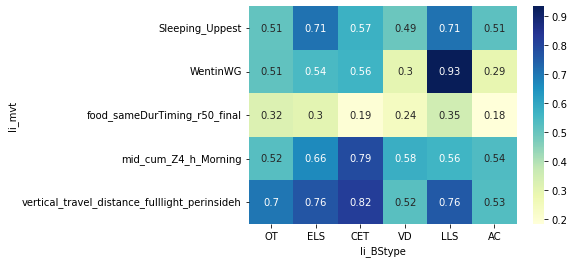

In [20]:
#all R with colors
df_plt = df_R.pivot(index='li_mvt', columns='li_BStype', values='li_R')#.reset_index()
df_plt = df_plt[['OT','ELS','CET','VD','LLS','AC']]
#df_plt
li_col = list(df_R['li_BStype'].unique())
li_col
# If we do a heatmap, we just observe that one column has higher values than others:
sns.heatmap(df_plt, cmap='YlGnBu', annot=True,
            xticklabels=list(df_plt.columns), yticklabels=list(df_plt.index))
plt.savefig(os.path.join(path_extracted_data,'R_all.png'),dpi=300,format='png',bbox_inches='tight')
plt.show()

In [21]:
#todo:https://www.python-graph-gallery.com/94-use-normalization-on-seaborn-heatmap

### row wise - mvt wise

In [22]:
#https://stackoverflow.com/questions/38246559/how-to-create-a-heat-map-in-python-that-ranges-from-green-to-red
#cmap_ = LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 
cmap_ = LinearSegmentedColormap.from_list('rg',["lightgrey", "black"], N=256) 
#cmap='RdYlGn'

li_BStype,OT,ELS,CET,VD,LLS,AC
li_mvt,,,,,,
Sleeping_Uppest,0.060671,1.000000,0.359114,0.000000,0.994787,0.094542
WentinWG,0.339132,0.394450,0.424209,0.014442,1.000000,0.000000
food_sameDurTiming_r50_final,0.836852,0.724702,0.060665,0.341766,1.000000,0.000000
mid_cum_Z4_h_Morning,0.000000,0.533708,1.000000,0.199395,0.136365,0.049797
vertical_travel_distance_fulllight_perinsideh,0.598613,0.819103,1.000000,0.000000,0.794439,0.030243


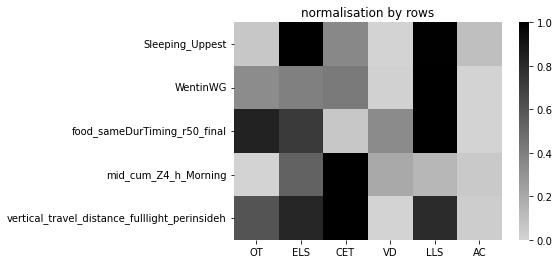

In [23]:
#normalize by row
df_plt_nr = df_plt.copy()
#list(df_plt_nc.index): keep same order
for mv in list(df_plt_nr.index): 
    df_plt_nr.loc[mv] = (df_plt_nr.loc[mv]-df_plt_nr.loc[mv].min())/(df_plt_nr.loc[mv].max()-df_plt_nr.loc[mv].min())
display(df_plt_nr)
sns.heatmap(df_plt_nr, cmap=cmap_, annot=False,
        xticklabels=list(df_plt_nr.columns), yticklabels=list(df_plt_nr.index))
plt.xlabel('');
plt.ylabel('');
plt.title('normalisation by rows')
plt.savefig(os.path.join(path_extracted_data,'R_normalizedrowwise.png'),dpi=300,format='png',bbox_inches='tight')
plt.show();

In [24]:
#TODO with Var, mean of tempearture or age
#sns.scatterplot()

### columns wise - within context

li_BStype,OT,ELS,CET,VD,LLS,AC
li_mvt,,,,,,
Sleeping_Uppest,0.492518,0.881880,0.605881,0.754425,0.616274,0.934297
WentinWG,0.497147,0.524176,0.593146,0.180596,1.000000,0.304157
food_sameDurTiming_r50_final,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mid_cum_Z4_h_Morning,0.538841,0.784362,0.950885,1.000000,0.363470,1.000000
vertical_travel_distance_fulllight_perinsideh,1.000000,1.000000,1.000000,0.839673,0.698924,0.983119


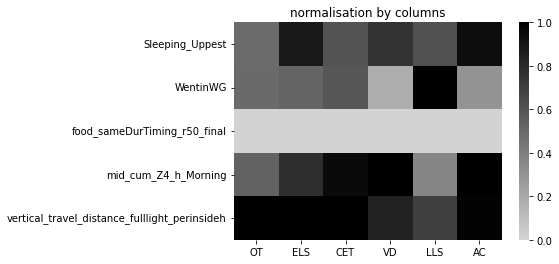

In [25]:
#normalize by column
df_plt_nc = (df_plt[li_col]-df_plt[li_col].min())/(df_plt[li_col].max()-df_plt[li_col].min())
display(df_plt_nc)
sns.heatmap(df_plt_nc, cmap=cmap_, annot=False,
            xticklabels=list(df_plt_nc.columns), yticklabels=list(df_plt_nc.index))
plt.xlabel('');
plt.ylabel('');
plt.title('normalisation by columns')
plt.savefig(os.path.join(path_extracted_data,'R_normalizedcolumnwise.png'),dpi=300,format='png',bbox_inches='tight')
plt.show();

#not sure about this, to think mroe if we want this!! TODO. shouldtn latency_1_Zone_15mn_3h be like mid_cum_Z4_h_Morning?
dico_mvt_type = {'food_related_behavior_final_inv_cst':'movement', 
                 'mid_cum_Z4_h_Morning':'space use',
                 'Sleeping_NotUppest':'space use',
                 'vertical_travel_distance_fulllight_perinsideh':'movement',
                 'latency_1_Zone_15mn_3h':'movement'}
df_ = df_plt_nc.reset_index()
df_['mvt_type'] = df_['li_mvt'].map(lambda x: dico_mvt_type[x])
df_ = pd.melt(df_, id_vars=['li_mvt', 'mvt_type'], value_vars=list(df_R['li_BStype'].unique()), value_name = 'BStype')
display(df_.head(3))
plt.figure(figsize=(10,5))
#sns.boxplot(x='mvt_type', y='BStype', data=df_, hue='li_mvt');
sns.boxplot(x='mvt_type', y='BStype', data=df_[df_['li_BStype'].isin(['LP2', 'LP10', 'time'])], hue='li_BStype', color='grey');